# Agrupar perfiles de sueño

## 🎯 Objetivo del ejercicio:
Analizar perfiles de sueño simulados de distintas personas para agruparlos según sus patrones de descanso utilizando el algoritmo de k-medias (K-Means). El objetivo es encontrar tipos de durmientes (como los que duermen mucho, los que se despiertan frecuentemente, etc.) a partir de sus datos personales.

## 🧠 Contexto:
Un equipo de investigadores del sueño quiere estudiar cómo duermen diferentes personas durante varias noches. Para ello, han registrado características clave como:

1. Duración del sueño (en horas)
2. Latencia: cuántos minutos tarda la persona en dormirse
3. Cantidad de despertares por noche
4. Variabilidad: cuánto varía la hora a la que se acuesta cada día

Tu tarea es agrupar estos perfiles en 3 tipos de durmientes usando K-Means, y visualizar los resultados de manera clara y útil.

## 📊 Datos simulados:
Los datos serán generados aleatoriamente con estas distribuciones:

## 🧱 Estructura sugerida del código:

### Clases utilizadas:

1. **SleepProfile**
   - Representa un perfil individual de sueño, con atributos como duración del sueño, latencia, despertares y variabilidad.
   - Método `to_vector()`: convierte estos atributos en un vector numérico para el algoritmo.

2. **SleepDatasetGenerator**
   - Genera n perfiles de sueño aleatorios con características estadísticas realistas.
   - Usa distribución normal y de Poisson para crear variedad en los datos.

3. **SleepClusterer**
   - Se encarga de escalar los datos y aplicar el algoritmo K-Means para agrupar los perfiles en k grupos.
   - Usa `StandardScaler` para normalizar.
   - Devuelve las etiquetas de grupo y los datos escalados.

4. **SleepAnalysisExample**
   - Integra todo: genera los datos, entrena el modelo, agrupa y visualiza los resultados en un gráfico.
   - También imprime los centroides de cada grupo interpretados en la escala original.

## 📈 ¿Qué deberías mostrar al final?
- Los centroides de los grupos, interpretando lo que caracteriza a cada uno.
- Un gráfico de dispersión donde se vea la agrupación de perfiles por:
  - Eje X: Duración del sueño
  - Eje Y: Variabilidad de hora de dormir

Comentarios sobre posibles tipos de durmientes: ¿hay un grupo de "insomnes"? ¿otro de "buenos durmientes"?

## 🧪 Ejemplo de uso

```python
example = SleepAnalysisExample()
example.run()



##Salida esperada

###📌 Centroides de los grupos:
Grupo 0: Duración=6.30h, Latencia=19.3min, Despertares=1.2, Variabilidad=39.6min
Grupo 1: Duración=6.79h, Latencia=18.9min, Despertares=3.4, Variabilidad=26.5min
Grupo 2: Duración=7.98h, Latencia=18.6min, Despertares=1.0, Variabilidad=22.3min



📌 Centroides de los grupos:
Grupo 0: Duración=6.30h, Latencia=19.3min, Despertares=1.2, Variabilidad=39.6min
Grupo 1: Duración=6.79h, Latencia=18.9min, Despertares=3.4, Variabilidad=26.5min
Grupo 2: Duración=7.98h, Latencia=18.6min, Despertares=1.0, Variabilidad=22.3min


C:\Users\Acer\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128164 (\N{SLEEPING SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


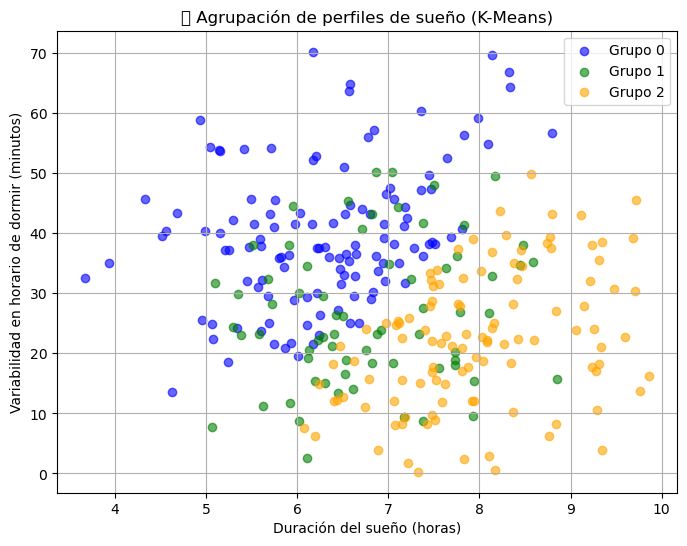

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Clase SleepProfile: un perfil individual de sueño
class SleepProfile:
    def __init__(self, duration, latency, wakeups, variability):
        self.duration = duration  # duración en horas
        self.latency = latency  # latencia en minutos
        self.wakeups = wakeups  # número de despertares
        self.variability = variability  # variabilidad en minutos

    def to_vector(self):
        return [self.duration, self.latency, self.wakeups, self.variability]

# 2. Clase SleepDatasetGenerator: simulación de datos realistas
class SleepDatasetGenerator:
    def __init__(self, n=300):  # n es el número de perfiles generados
        self.n = n

    def generate(self):
        np.random.seed(0)  # Para reproducibilidad

        # Generación de datos sintéticos
        durations = np.random.normal(7, 1.2, self.n)  # Duración del sueño en horas
        latencies = np.abs(np.random.normal(20, 10, self.n))  # Latencia en minutos
        wakeups = np.random.poisson(1.5, self.n)  # Despertares por noche
        variabilities = np.abs(np.random.normal(30, 15, self.n))  # Variabilidad de la hora de dormir

        profiles = []
        for d, l, w, v in zip(durations, latencies, wakeups, variabilities):
            profiles.append(SleepProfile(d, l, w, v))
        return profiles

# 3. Clase SleepClusterer: aplicar K-Means a los perfiles
class SleepClusterer:
    def __init__(self, n_clusters=3):
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        self.scaler = StandardScaler()

    def fit(self, profiles):
        # Convertimos los perfiles a una matriz de características
        X = np.array([p.to_vector() for p in profiles])
        X_scaled = self.scaler.fit_transform(X)  # Escalamos los datos
        self.kmeans.fit(X_scaled)  # Aplicamos K-Means
        self.labels = self.kmeans.labels_
        return X_scaled, self.labels

    def get_cluster_centers(self):
        return self.scaler.inverse_transform(self.kmeans.cluster_centers_)

# 4. Clase SleepAnalysisExample: ejecuta todo el proceso
class SleepAnalysisExample:
    def run(self):
        # 4.1 Generación de datos
        generator = SleepDatasetGenerator()
        profiles = generator.generate()

        # 4.2 Aplicación de K-Means
        clusterer = SleepClusterer(n_clusters=3)
        X_scaled, labels = clusterer.fit(profiles)

        # 4.3 Crear un DataFrame con los datos
        df = pd.DataFrame([p.to_vector() for p in profiles],
                          columns=["Duración", "Latencia", "Despertares", "Variabilidad"])
        df["Grupo"] = labels

        # 4.4 Mostrar los centroides de los grupos
        print("📌 Centroides de los grupos:")
        centers = clusterer.get_cluster_centers()
        for i, c in enumerate(centers):
            print(f"Grupo {i}: Duración={c[0]:.2f}h, Latencia={c[1]:.1f}min, Despertares={c[2]:.1f}, Variabilidad={c[3]:.1f}min")

        # 4.5 Visualización con matplotlib
        colores = ['blue', 'green', 'orange']
        plt.figure(figsize=(8, 6))
        for i in range(clusterer.n_clusters):
            subset = df[df["Grupo"] == i]
            plt.scatter(subset["Duración"], subset["Variabilidad"],
                        c=colores[i], label=f"Grupo {i}", alpha=0.6)
        
        # Configuración de la visualización
        plt.xlabel("Duración del sueño (horas)")
        plt.ylabel("Variabilidad en horario de dormir (minutos)")
        plt.title("💤 Agrupación de perfiles de sueño (K-Means)")
        plt.grid(True)
        plt.legend()
        plt.show()

# 5. Ejecución del análisis
if __name__ == "__main__":
    example = SleepAnalysisExample()
    example.run()
